In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
# facilitates plotting matplotlib graphs just below code cells and storing them in the notebook doc.
%matplotlib inline

C:\Users\ForPeople\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

In [3]:
for a in assets:
    pf_data[a] = wb.DataReader(a,data_source='yahoo',start='2010-1-1')['Adj Close']

In [5]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,44.058792,1132.989990
2010-01-05,44.073223,1136.520020
2010-01-06,43.864162,1137.140015
2010-01-07,43.626297,1141.689941
2010-01-08,43.568630,1144.979980


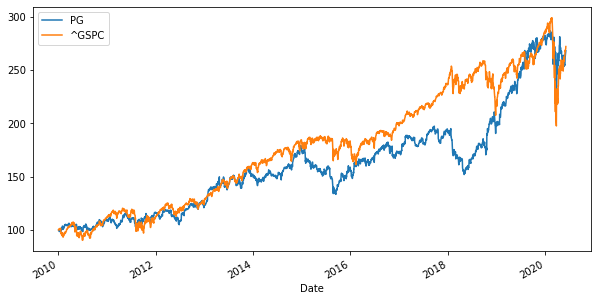

In [6]:
( pf_data / pf_data.iloc[0] * 100 ).plot(figsize=(10,5))

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
...,...,...
2020-05-27,0.016466,0.014718
2020-05-28,0.018874,-0.002110
2020-05-29,-0.001207,0.004801


In [9]:
log_returns.mean() * 250

PG       0.094052
^GSPC    0.095452
dtype: float64

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029506,0.017841
^GSPC,0.017841,0.030281


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.596867
^GSPC,0.596867,1.000000


In [13]:
num_assets = len(assets)
num_assets

2

In [14]:
arr = np.random.random(2)
arr

array([0.76472776, 0.76233081])

In [16]:
arr[0] + arr[1]

1.527058568839256

In [17]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.9043489, 0.0956511])

In [18]:
weights[0] + weights[1]

1.0